Juan Pablo Meza

CIS 2532

This program implements intuitive deep learning within a housing data set.

In [2]:
!pip install tensorflow
#importing the necessary libraries
import pandas as pd
from keras.layers import Dropout 
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#importing the dataset
df = pd.read_csv('housepricedata.csv')

In [4]:
#displaying the dataset
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
#converting the dataframe into an array
dataset = df.values

In [6]:
#displaying the data from the newly created array
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [7]:
#splitting the dataset into input features and the labels in order to predict
X = dataset[:,0:10]
Y = dataset[:,10]

In [8]:
#using a min-max scaler from scikit-learn to scale our data to be between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
#displaying the data of the newly scaled data within the 'X_scale' varible
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [11]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [12]:
X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((1022, 10), (219, 10), (219, 10), (1022,), (219,), (219,))



Importing the data necessary to train the neural network from Keras

The neural network will have 3 layers: 

Hidden Layer 1: 30 neurons, ReLU activation

Hidden Layer 2: 30 neurons, ReLU activation

Output Layer: 1 neuron, Sigmoid activation


ReLU activation: The Rectified Linear Unit is the most commonly used activation function in deep learning models.

Sigmoid activation: It is the same function used in the logistic regression classification algorithm

In [13]:
model = Sequential([Dense(32, activation='relu', input_shape=(10,)),Dense(32, activation='relu'),Dense(1, activation='sigmoid'),])

Configuring the model by...

Telling it what algorithm we want to use to optimize it. (Will be using stochastic gradient descent)

Telling it what loss function to use. (Binary classification, we will use binary cross entropy)

Telling it what other metrics we want to track, other than the loss function. (Tracking accuracy)


Stochastic gradient descent: An iterative method for optimizing an objectiv function.

Binary Cross Entropy: Compares every predicted probability  to an actual class output. The output can either be 0 or 1



In [14]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the data by...

Figuring out what data we are training, 'X_train' or 'Y_train'

the size of the mini-batch\

how long the training is going to go for

what the validation data is so the model can tell us if the data is valid or not.

In [15]:
hist = model.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data = (X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.7103 - accuracy: 0.4922 - val_loss: 0.7011 - val_accuracy: 0.5068
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4990 - val_loss: 0.6917 - val_accuracy: 0.5251
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.6497 - val_loss: 0.6848 - val_accuracy: 0.6667
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.7339 - val_loss: 0.6793 - val_accuracy: 0.6941
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.7055 - val_loss: 0.6746 - val_accuracy: 0.6986
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.7114 - val_loss: 0.6702 - val_accuracy: 0.6986
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.7035 - val_loss: 0.6657 - val_accuracy: 0.7032
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3289 - accuracy: 0.8806 - val_loss: 0.3505 - val_accuracy: 0.8402
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.8757 - val_loss: 0.3492 - val_accuracy: 0.8265
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3249 - accuracy: 0.8836 - val_loss: 0.3476 - val_accuracy: 0.8265
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.8796 - val_loss: 0.3456 - val_accuracy: 0.8447
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.8787 - val_loss: 0.3439 - val_accuracy: 0.8447
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3190 - accuracy: 0.8806 - val_loss: 0.3422 - val_accuracy: 0.8356
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.8826 - val_loss: 0.3408 - val_accuracy: 0.8493
Epoch 

In [16]:
#evaluating the data on the test set
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9178


0.9178082346916199



Visualizing the Loss and Accuracy of the data

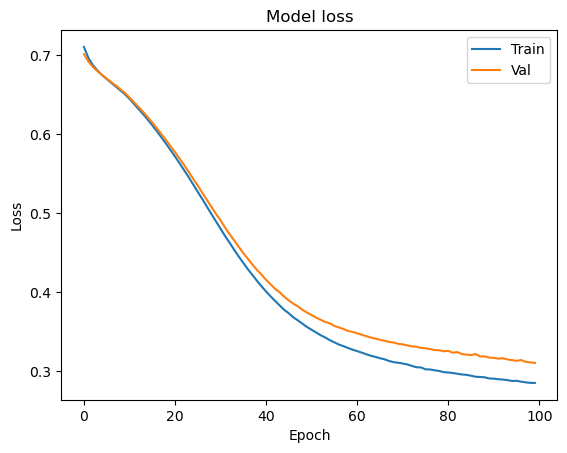

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Another way to visualize the data

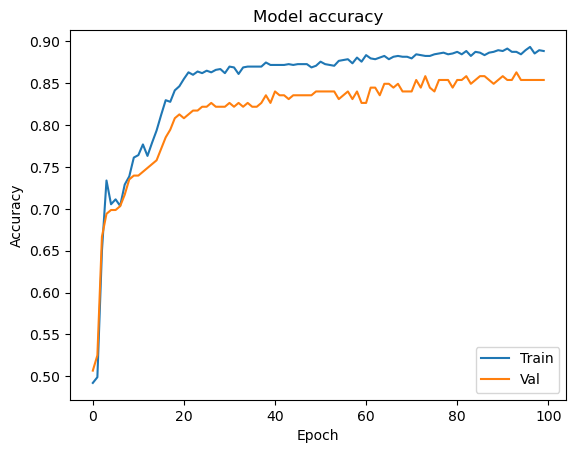

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Adding regularization to the neural network

We'll do so by training the model which will overfit, we will call the new model 'Model 2'

In [19]:
model_2 = Sequential([Dense(1000, activation='relu', input_shape=(10,)), Dense(1000, activation='relu'), Dense(1000, activation='relu'), Dense(1000, activation='relu'), Dense(1, activation='sigmoid'),])
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.4794 - accuracy: 0.7779 - val_loss: 0.5401 - val_accuracy: 0.8174
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3631 - accuracy: 0.8571 - val_loss: 0.3732 - val_accuracy: 0.8219
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.8611 - val_loss: 0.3700 - val_accuracy: 0.8356
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8816 - val_loss: 0.3188 - val_accuracy: 0.8447
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2807 - accuracy: 0.8875 - val_loss: 0.3081 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3253 - accuracy: 0.8601 - val_loss: 0.4129 - val_accuracy: 0.8447
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.8904 - val_loss: 0.2961 - val_accuracy: 0.8630
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1622 - accuracy: 0.9325 - val_loss: 0.3683 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1620 - accuracy: 0.9384 - val_loss: 0.3327 - val_accuracy: 0.8995
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9354 - val_loss: 0.3262 - val_accuracy: 0.9041
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 0.9266 - val_loss: 0.3991 - val_accuracy: 0.8584
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1634 - accuracy: 0.9325 - val_loss: 0.4333 - val_accuracy: 0.8630
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1773 - accuracy: 0.9247 - val_loss: 0.3283 - val_accuracy: 0.8858
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1588 - accuracy: 0.9325 - val_loss: 0.2954 - val_accuracy: 0.8813
Epoch 

Visualize the new data

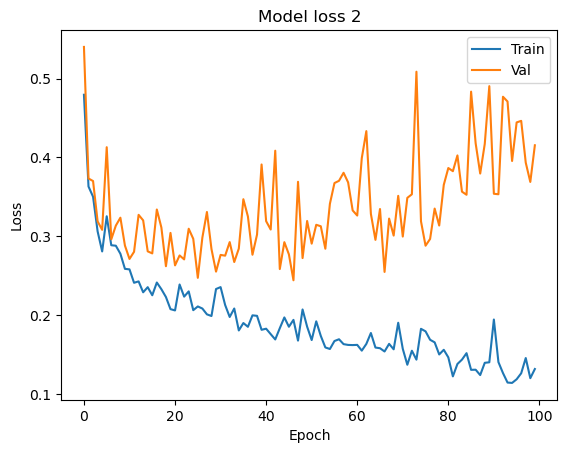

In [20]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

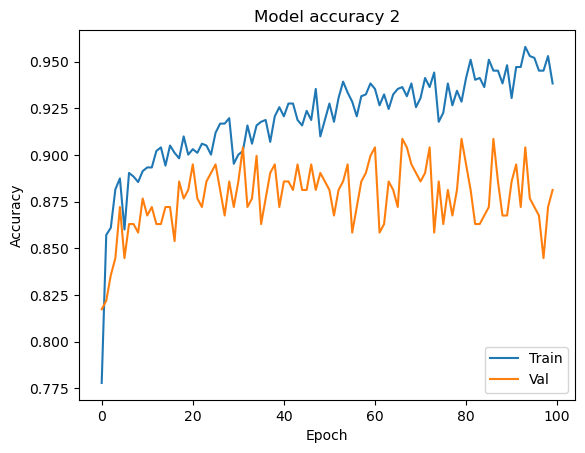

In [21]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy 2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Incorporating L2 regularization to address overfitting of data in the new model below 'Model 3'

In [22]:
model_3 = Sequential([Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)), Dropout(0.3), Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3),Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))])

In [23]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 14.2488 - accuracy: 0.5900 - val_loss: 3.9143 - val_accuracy: 0.7260
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 1.6734 - accuracy: 0.8288 - val_loss: 0.7146 - val_accuracy: 0.8219
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5701 - accuracy: 0.8620 - val_loss: 0.5384 - val_accuracy: 0.8219
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5086 - accuracy: 0.8699 - val_loss: 0.4996 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.8826 - val_loss: 0.5000 - val_accuracy: 0.8539
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4825 - accuracy: 0.8787 - val_loss: 0.4844 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5131 - accuracy: 0.8513 - val_loss: 0.4950 - val_accuracy: 0.8539
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.8826 - val_loss: 0.4577 - val_accuracy: 0.8584
Epoch 60/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4483 - accuracy: 0.8806 - val_loss: 0.4579 - val_accuracy: 0.8630
Epoch 61/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4426 - accuracy: 0.8865 - val_loss: 0.4578 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4512 - accuracy: 0.8806 - val_loss: 0.4599 - val_accuracy: 0.8584
Epoch 63/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4391 - accuracy: 0.8855 - val_loss: 0.4596 - val_accuracy: 0.8584
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4425 - accuracy: 0.8796 - val_loss: 0.4668 - val_accuracy: 0.8584
Epoch 65/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4437 - accuracy: 0.8836 - val_loss: 0.4410 - val_accuracy: 0.8721
Epoch 

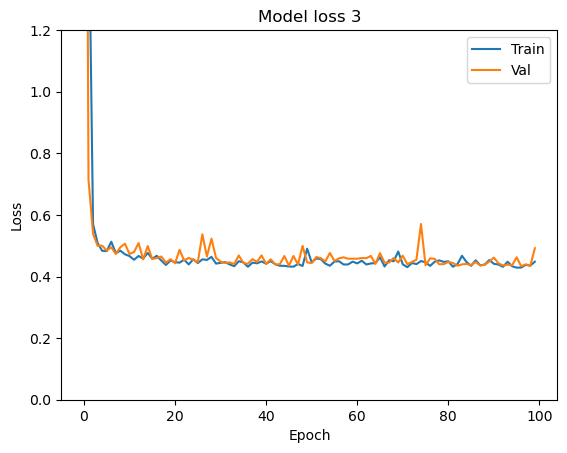

In [24]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss 3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

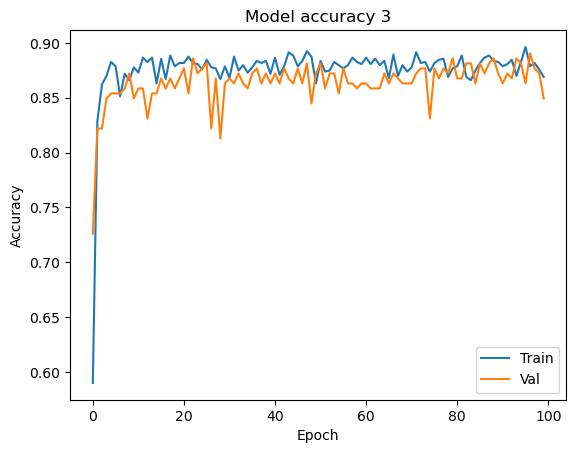

In [25]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy 3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As expected, less overfitting in the charts that were just created

Credits to Author:

Joseph Lee

Github Repository:

https://github.com/josephlee94/intuitive-deep-learning/tree/master/Part%201:%20Predicting%20House%20Prices